# Second Hand Car Price Prediction

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import joblib
import warnings

In [351]:
warnings.filterwarnings("ignore")

In [352]:
df = pd.read_csv("Cars_24.csv")

In [353]:
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [355]:
df.rename({"Trustmark Dealer":"Trustmark_Dealer"}, axis=1, inplace=True)

### Checking duplicate values

In [356]:
print(f"Train data duplicate : {df.duplicated().sum()}")

Train data duplicate : 159


In [357]:
df.drop_duplicates(inplace=True)

In [358]:
print(f"Train data duplicate : {df.duplicated().sum()}")

Train data duplicate : 0


In [359]:
x = df.iloc[:,1:]
x.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark_Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [360]:
x.shape

(19661, 17)

In [361]:
y = df["selling_price"]
y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [362]:
y.shape

(19661,)

In [363]:
df["make"].nunique()

41

In [364]:
df["model"].nunique()

3233

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [367]:
x_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark_Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
7673,2005.0,92208,19.70,796.0,35.0,18.0,MARUTI,OMNI 8 SEATER BSII,0,0,0,0,0,1,1,0,1
7443,2016.0,120000,25.80,1498.0,98.6,7.0,HONDA,AMAZE VX I-DTEC,1,0,1,0,0,0,1,1,0
17642,2014.0,40000,19.40,1198.0,86.8,9.0,HONDA,BRIO VX,1,0,0,0,0,1,1,1,0
18985,2012.0,58000,17.00,1497.0,118.0,11.0,HONDA,CITY 1.5 V MT,0,0,0,0,0,1,1,1,0
8244,2015.0,91000,12.99,2494.0,100.6,8.0,TOYOTA,INNOVA 2.5 ZX DIESEL 7 SEATER,0,0,1,0,0,0,1,0,1


In [368]:
y_train.head()

7673      1.45
7443      4.70
17642     4.00
18985     5.75
8244     11.50
Name: selling_price, dtype: float64

In [369]:
x_test.shape

(3933, 17)

In [370]:
y_test.shape

(3933,)

In [371]:
x_train.iloc[:,:6]

,year,km_driven,mileage,engine,max_power,age
7673,2005.0,92208,19.70,796.0,35.00,18.0
7443,2016.0,120000,25.80,1498.0,98.60,7.0
17642,2014.0,40000,19.40,1198.0,86.80,9.0
18985,2012.0,58000,17.00,1497.0,118.00,11.0
8244,2015.0,91000,12.99,2494.0,100.60,8.0
...,...,...,...,...,...,...
13201,2013.0,68000,12.99,2494.0,100.00,10.0
19807,2018.0,25000,22.00,1197.0,81.80,5.0
9893,2017.0,60500,18.50,1198.0,86.80,6.0
10856,2011.0,102620,17.00,1497.0,118.00,12.0


### Visualization of outliers

In [372]:
def outlier_plot(data, colomns, color):
    i = 1
    plt.figure(figsize=(16,9))
    for num_col in colomns:
        plt.subplot(2,3,i)
        sns.boxplot(x = data[num_col], color=color)
        plt.title(f'Box plot of {num_col}')
        i += 1
    plt.show()

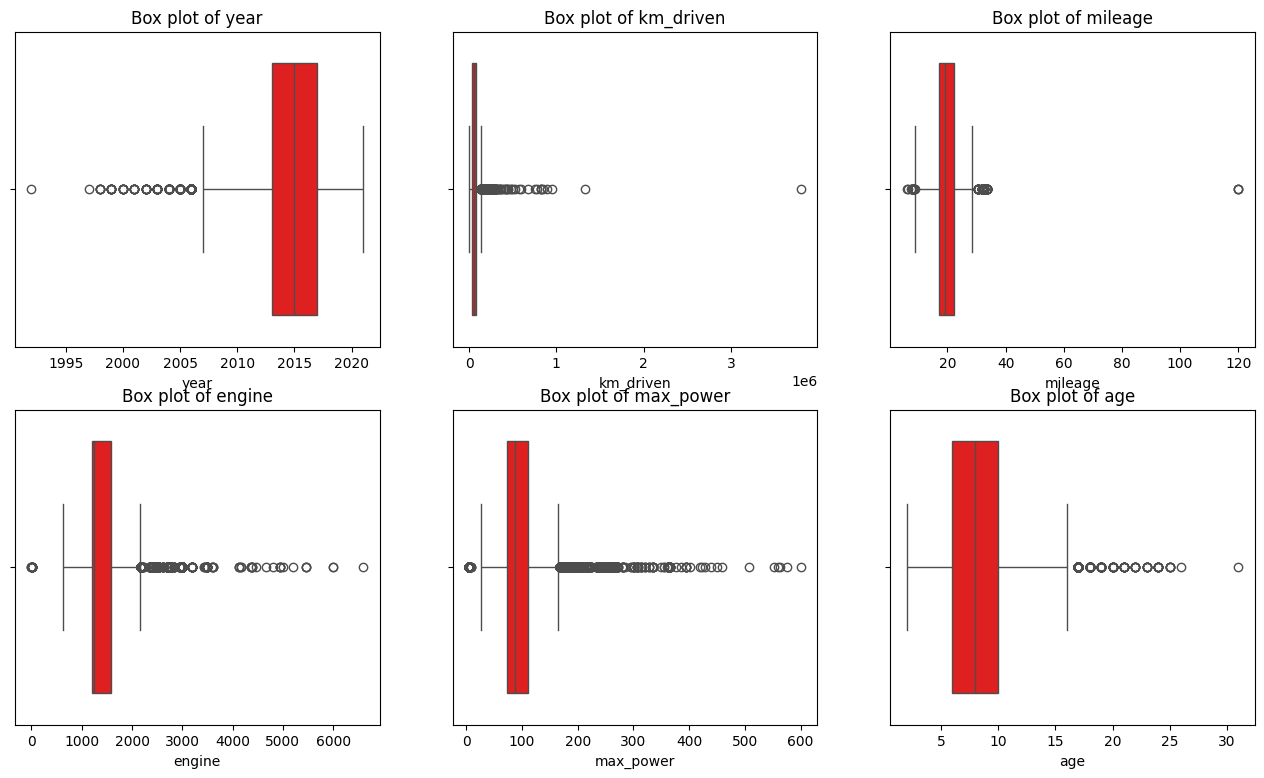

In [373]:
outlier_plot(x_train, x_train.iloc[:,:6], "red")

### Treatment of outliers 

In [374]:
def outlier_treatment(data, colomns):
    for colos in colomns:
    
        # finding q1, q3 and IQR
        q1 = data[colos].quantile(0.25)
        q3 = data[colos].quantile(0.75)
        IQR = q3 - q1
    
        # finding upper wisker and lower wisker
        upper_wisker = q3 + 1.5 * IQR
        lower_wisker = q1 - 1.5 * IQR
    
        # capping the outliers
        data[colos] = data[colos].clip(lower=lower_wisker, upper=upper_wisker)

In [375]:
# calling outlier treatment function to treat outliers
outlier_treatment(x_train, x_train.iloc[:,:6])

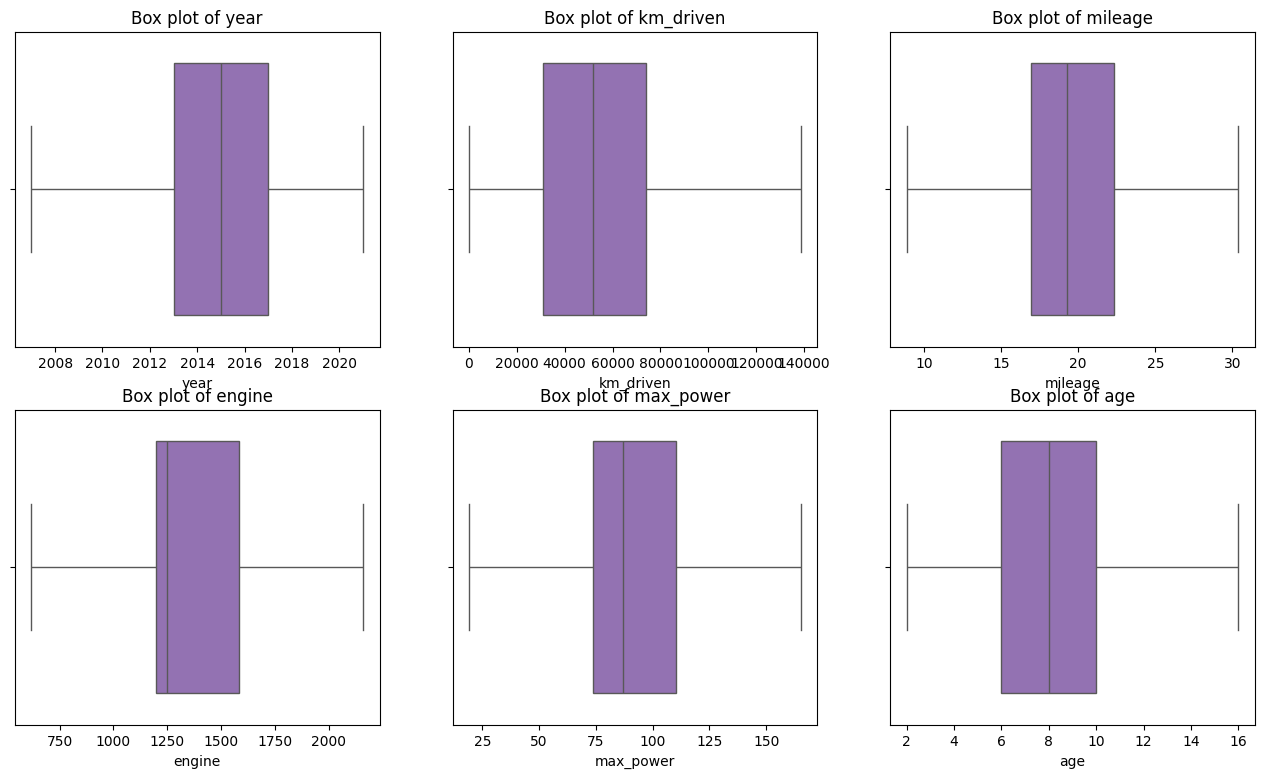

In [376]:
# checking the treatment 
outlier_plot(x_train, x_train.iloc[:,:6], "C4")

## Data Modeling

In [330]:
# !pip install category_encoders

In [331]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge

In [332]:
# Pipeline with smoothed TargetEncoder
pipeline = Pipeline([ ("Target_encode", TargetEncoder(cols=["make","model"], smoothing=0.3, min_samples_leaf=20)),
                      ("scaler", StandardScaler()), 
                      ("poly", PolynomialFeatures(degree=2, include_bias=False)),
                      ("ridge", Ridge(alpha=6.4))
                    ])

In [333]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Target_encode',
                 TargetEncoder(cols=['make', 'model'], smoothing=0.3)),
                ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=6.4))])

### Final transformed features after encoding , scaling and poly

In [262]:
transformed_x_train = pipeline[:-1].transform(x_train)
print("Shape - ",transformed_x_train.shape)
print("transformed_x_trained data -> ",transformed_x_train[:6])

Shape -  (15728, 170)
transformed_x_trained data ->  [[-2.48367227  1.11580293  0.05785434 ...  5.09140201 -5.33836895
   5.59731544]
 [ 0.45277242  1.97356303  1.57483221 ...  0.19640955 -0.18732313
   0.17865707]
 [-0.19977084 -0.49552189 -0.01675113 ...  0.19640955 -0.18732313
   0.17865707]
 [-0.85231411  0.06002221 -0.61359488 ...  0.19640955 -0.18732313
   0.17865707]
 [ 0.12650079  1.07851974 -1.61082131 ...  5.09140201 -5.33836895
   5.59731544]
 [ 0.45277242 -0.53067549  1.12719939 ...  0.19640955 -0.18732313
   0.17865707]]


### Prepare test data

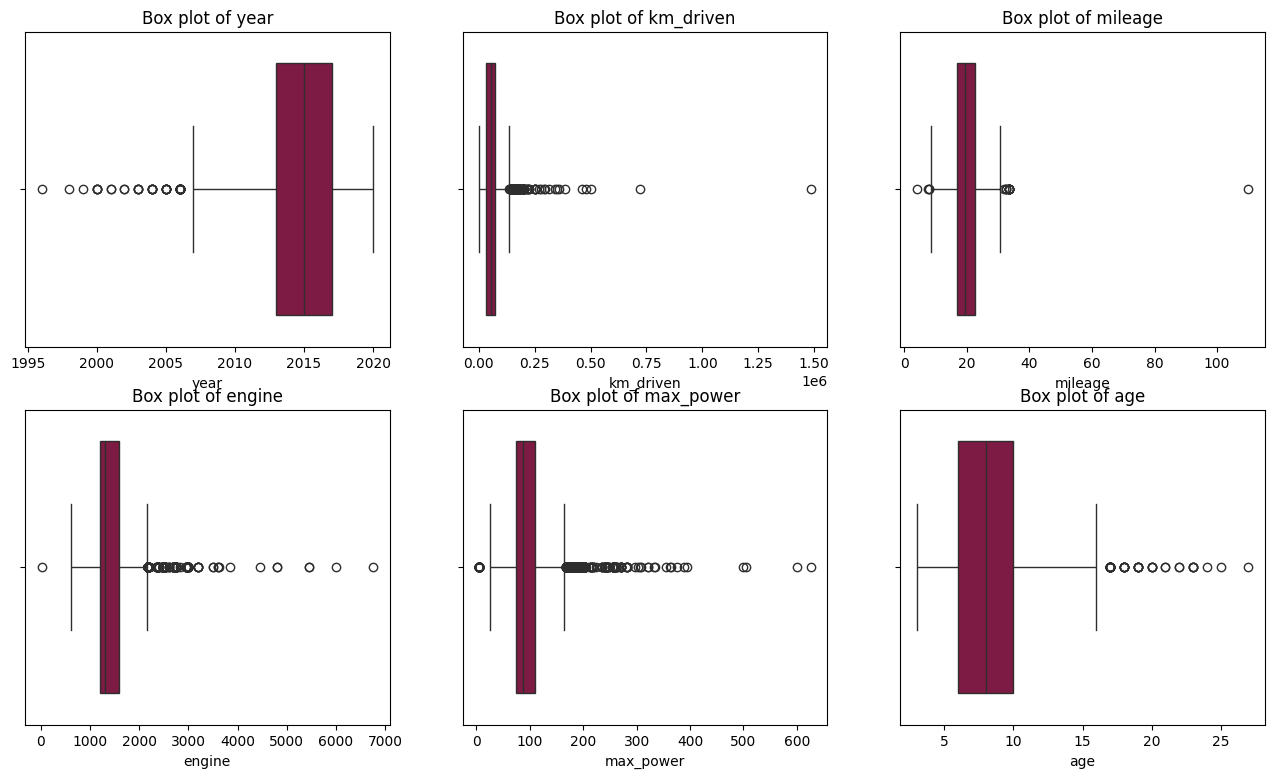

In [387]:
# visualization of outliers on test data
outlier_plot(x_test, x_train.iloc[:,:6], '#8D0B41')

In [388]:
# treatment of outliers on test data
outlier_treatment(x_test, x_train.iloc[:,:6])

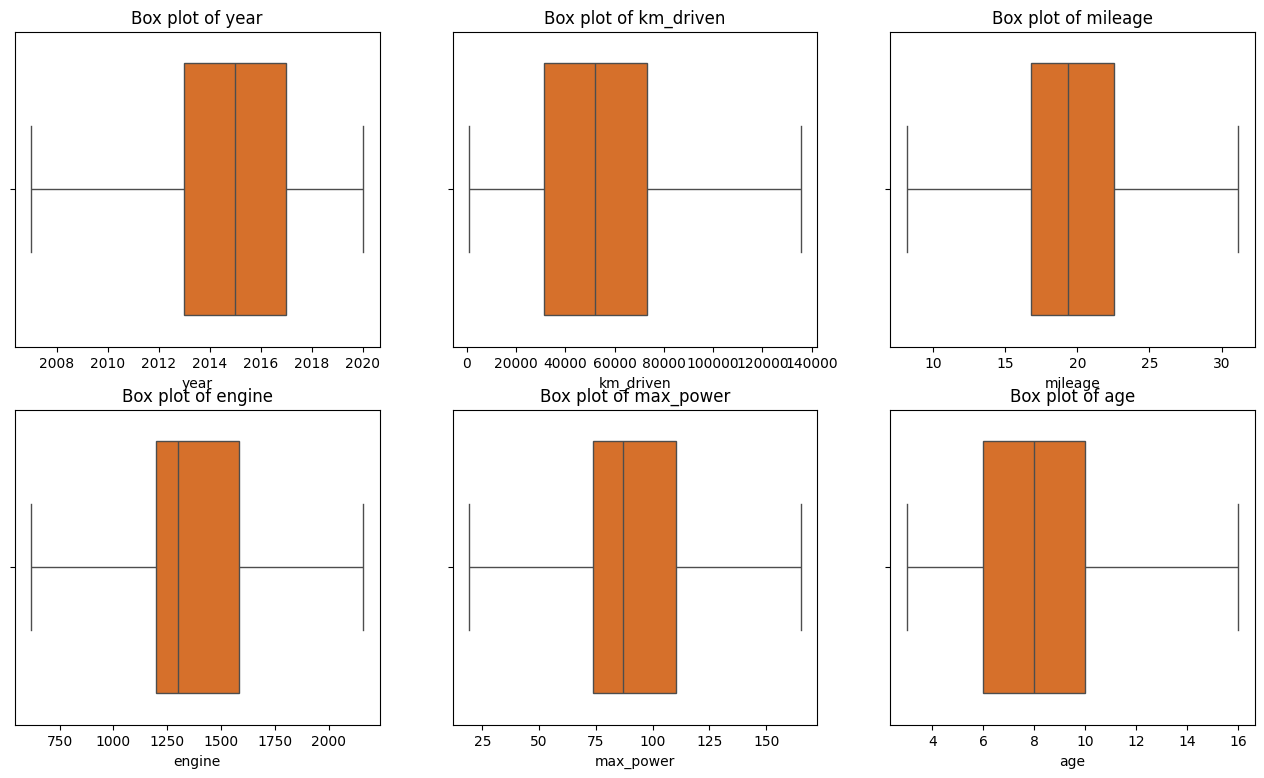

In [389]:
# checking outliers after treatment
outlier_plot(x_test, x_train.iloc[:,:6], '#F26B0F')

## Testing data on higher degree

In [344]:
x_test_pred_poly = pipeline.predict(x_test)
x_test_pred_poly

array([4.38839258, 3.43682975, 5.9081815 , ..., 4.22333307, 7.60104059,
       4.35862072], shape=(3933,))

In [345]:
pipeline.score(x_train,y_train)

0.904441293312073

In [348]:
pipeline.score(x_test,y_test)

0.8888858561192392

In [349]:
# Save the model
joblib.dump(pipeline, "poly_model.joblib")

['poly_model.joblib']

## Tained data on Linear Regression 

Encoding Train Data

In [377]:
encoder_1 = TargetEncoder(cols=["make"])
x_train["make"] = encoder_1.fit_transform(x_train["make"], y_train)

In [378]:
encoder_2 = TargetEncoder(cols=["model"])
x_train["model"] = encoder_2.fit_transform(x_train["model"], y_train)

In [379]:
x_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark_Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
7673,2007.0,92208.0,19.70,796.0,35.0,16.0,4.669220,5.520779,0,0,0,0,0,1,1,0,1
7443,2016.0,120000.0,25.80,1498.0,98.6,7.0,5.970523,5.447008,1,0,1,0,0,0,1,1,0
17642,2014.0,40000.0,19.40,1198.0,86.8,9.0,5.970523,5.998810,1,0,0,0,0,1,1,1,0
18985,2012.0,58000.0,17.00,1497.0,118.0,11.0,5.970523,5.196339,0,0,0,0,0,1,1,1,0
8244,2015.0,91000.0,12.99,2159.5,100.6,8.0,10.508997,7.658415,0,0,1,0,0,0,1,0,1


Scaling Train Data

In [380]:
from sklearn.preprocessing import StandardScaler

In [381]:
scaler = StandardScaler()

In [382]:
scaled_train = scaler.fit_transform(x_train)
scaled_train

array([[-2.48367227,  1.11580293,  0.05785434, ...,  0.4920791 ,
        -2.25641353,  2.36586463],
       [ 0.45277242,  1.97356303,  1.57483221, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       [-0.19977084, -0.49552189, -0.01675113, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       ...,
       [ 0.77904405,  0.13718112, -0.24056754, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       [-1.17858574,  1.43715433, -0.61359488, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       [-0.19977084,  1.04765618, -1.47155777, ...,  0.4920791 ,
        -2.25641353,  2.36586463]], shape=(15728, 17))

In [383]:
x_train[x_train.columns] = scaled_train
x_train.sample(1)

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark_Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
10766,1.105316,-0.156023,0.505487,0.182956,0.415748,-1.105316,-0.61531,0.292372,-0.805809,-0.097797,1.022116,-0.021101,-0.058696,-0.982478,0.492079,0.443181,-0.422678


Modeling Data by Linear Regression

In [384]:
from sklearn.linear_model import LinearRegression

In [385]:
model = LinearRegression()

In [386]:
model.fit(x_train, y_train)

LinearRegression()

Encoding Test Data

In [390]:
x_test["make"] = encoder_1.transform(x_test["make"], y_test)
x_test.head(2)

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark_Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5965,2015.0,65922.0,18.6,1197.0,81.83,8.0,5.491113,I20 2015-2017 SPORTZ OPTION 1.2,0,0,0,0,0,1,1,1,0
11594,2012.0,46967.0,16.7,1198.0,88.80,11.0,5.970523,JAZZ X,0,0,0,0,0,1,1,1,0


In [391]:
x_test["model"] = encoder_2.transform(x_test["model"], y_test)
x_test.head(2)

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark_Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5965,2015.0,65922.0,18.6,1197.0,81.83,8.0,5.491113,6.364653,0,0,0,0,0,1,1,1,0
11594,2012.0,46967.0,16.7,1198.0,88.80,11.0,5.970523,5.960656,0,0,0,0,0,1,1,1,0


Scaling Test Data

In [392]:
scaled_test = scaler.transform(x_test)
scaled_test

array([[ 0.12650079,  0.30452335, -0.21569905, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       [-0.85231411, -0.28049546, -0.68820035, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       [ 0.77904405,  0.27217834,  1.42562127, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       ...,
       [-2.48367227,  2.45150071, -1.65807144, ...,  0.4920791 ,
        -2.25641353,  2.36586463],
       [ 1.10531569, -0.49552189,  0.47564497, ...,  0.4920791 ,
         0.44318118, -0.42267845],
       [ 0.12650079,  0.37118864,  0.97798845, ...,  0.4920791 ,
         0.44318118, -0.42267845]], shape=(3933, 17))

In [393]:
x_test[x_test.columns] = scaled_test

In [394]:
y_pred = model.predict(x_test)
y_pred

array([5.14213749, 4.35968913, 5.91750835, ..., 5.60443161, 8.18026997,
       4.11101491], shape=(3933,))

R<sup>2</sup> Score

In [395]:
model.score(x_train, y_train)

0.8526845024764362

In [396]:
model.score(x_test, y_test)

0.8354590658660414

### <b>Observation</b> : 2 degree polynomial regression is used instead of Linear Regression because poly provided good accuracy on both train and test data.